In [9]:
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [10]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [11]:
X_train.shape

(50000, 32, 32, 3)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [14]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [16]:
classes =  ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [17]:
def plt_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

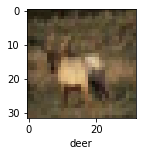

In [18]:
plt_sample(X_train,y_train,3)

In [19]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 94s 59ms/step - loss: 1.8106 - accuracy: 0.3544
Epoch 2/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.6232 - accuracy: 0.4264
Epoch 3/5
1563/1563 [==============================] - 93s 60ms/step - loss: 1.5445 - accuracy: 0.4540
Epoch 4/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.4840 - accuracy: 0.4761
Epoch 5/5
1563/1563 [==============================] - 93s 60ms/step - loss: 1.4324 - accuracy: 0.4941


In [28]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.52      0.55      1000
           1       0.71      0.38      0.50      1000
           2       0.36      0.37      0.37      1000
           3       0.35      0.34      0.35      1000
           4       0.48      0.29      0.36      1000
           5       0.45      0.32      0.37      1000
           6       0.48      0.59      0.53      1000
           7       0.54      0.55      0.54      1000
           8       0.68      0.50      0.57      1000
           9       0.36      0.82      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [20]:
cnn = models.Sequential([
                         
        layers.Conv2D(filters=30,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D(pool_size=(2,2)),
         layers.Conv2D(filters=50,kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),


        layers.Flatten(),
        layers.Dense(50, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4933 - accuracy: 0.4628
Epoch 2/5
1563/1563 [==============================] - 57s 37ms/step - loss: 1.1524 - accuracy: 0.5961
Epoch 3/5
1563/1563 [==============================] - 57s 37ms/step - loss: 1.0276 - accuracy: 0.6420
Epoch 4/5
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9438 - accuracy: 0.6707
Epoch 5/5
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8822 - accuracy: 0.6945


In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.0355 - accuracy: 0.6429


[1.0354565382003784, 0.6428999900817871]

In [22]:
y_pred=cnn.predict(X_test)
y_pred[:5]

array([[1.3094683e-02, 8.7859817e-03, 1.7547958e-02, 5.3156793e-01,
        2.2038098e-03, 2.1544912e-01, 3.0353365e-02, 1.4168210e-03,
        7.6737851e-02, 1.0284246e-01],
       [3.5005309e-02, 9.3600523e-01, 5.3641281e-05, 9.7064765e-07,
        9.8833043e-06, 3.0080017e-07, 2.0396556e-08, 1.7168990e-06,
        1.7904429e-02, 1.1018418e-02],
       [6.7309044e-02, 6.2244457e-01, 6.4732200e-03, 6.2218281e-03,
        6.0888035e-03, 1.5413858e-03, 7.7780680e-04, 1.8007020e-03,
        1.9991511e-01, 8.7427489e-02],
       [7.2624087e-01, 4.1246679e-02, 2.8337000e-02, 4.8264200e-03,
        1.2806113e-02, 4.7586992e-04, 2.6740409e-03, 3.7208127e-04,
        1.8024693e-01, 2.7739571e-03],
       [1.1275069e-04, 1.9473187e-03, 1.1980361e-02, 5.3157154e-03,
        2.2479111e-01, 5.0942688e-03, 7.5001580e-01, 1.3771364e-05,
        7.0156140e-04, 2.7382197e-05]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 6]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [25]:
classes[y_classes[1]]

'automobile'

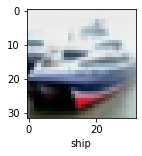

In [26]:
plt_sample(X_test,y_test,1)

In [27]:


print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.81      0.70      1000
           1       0.62      0.91      0.74      1000
           2       0.45      0.64      0.53      1000
           3       0.56      0.32      0.41      1000
           4       0.69      0.50      0.58      1000
           5       0.60      0.53      0.56      1000
           6       0.72      0.77      0.74      1000
           7       0.78      0.65      0.71      1000
           8       0.88      0.62      0.73      1000
           9       0.69      0.68      0.69      1000

    accuracy                           0.64     10000
   macro avg       0.66      0.64      0.64     10000
weighted avg       0.66      0.64      0.64     10000

